# NSE Health Care Data
## uso de Dataframes
---
Los Data frames son el tipo de objetos principales en pandas. Se pyeden acceder a las filas y columnas. Las columnas se consideran una Serie.

## Proceso para analizar un archivo
1. Cargar el archivo en un Dataframes. 
2. Hacer una revisión de los tipos de datos del archivo.
3. Revisar si existen datos nulos y datos duplicados en el archivo.
4. Eliminar inconsistencias.
5. Llevar a cabo el análisis apoyados.

## Consideraciones a tomar en cuenta:
- Elegir el archivo que contenga datos numéricos.
- Crear un archivo que contenga la descripción de su proceso de análisis.
- Preparar una presentación para el día de entrega.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# df.head(n) -> Primeras 5 filas de su archivo
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Selección de columnas
df["Nombre de la columna"]
df[['columna 1', 'columna 2']]
S
# Medidas de tendencia central
print(f"promedio: {df['age'].mean()}")
print(f"mediana: {df['age'].median()}")
print(f"moda: {df['age'].mode()[0]}")

# Medidas de dispersión
print(f"varianza: {df['age'].var()}")
print(f"desviación estándar: {df['age'].std()}")

# Medidas de posición
print(f"mínimo: {df['age'].min()}")
print(f"máximo: {df['age'].max()}")
print(f"cuartiles: {df['age'].quantile([0.25, 0.5, 0.75])}")


KeyError: 'Nombre de la columna'

<Axes: >

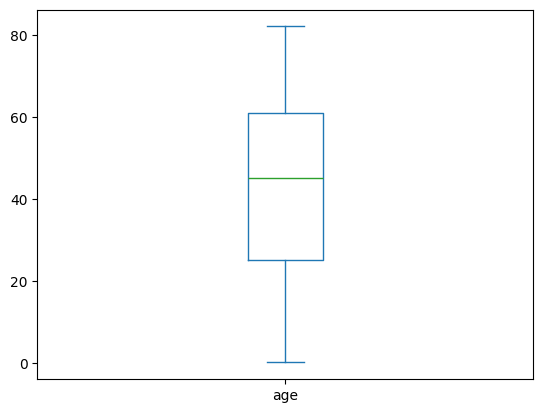

In [12]:
# cajas y bigotes (box & whisker) -> Gráficas de cajas (boxplots)
df['age'].plot.box()

In [9]:
columnas_numéricas = []
columnas_no_numéricas = []
for col in df.columns:
    if df[col].dtype == "object":
        columnas_no_numéricas.append(col)
    else:
        columnas_numéricas.append(col)
print(f"Columnas numéricas: {columnas_numéricas}")
print(f"Columnas no numéricas: {columnas_no_numéricas}")

Columnas numéricas: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Columnas no numéricas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [11]:
# df["hypertension"] =pd.to.numeric(df["hypertension"].str.replace("yes","1").str.replace("no","0"))
#sirve para convertir datos categoricos a numericos

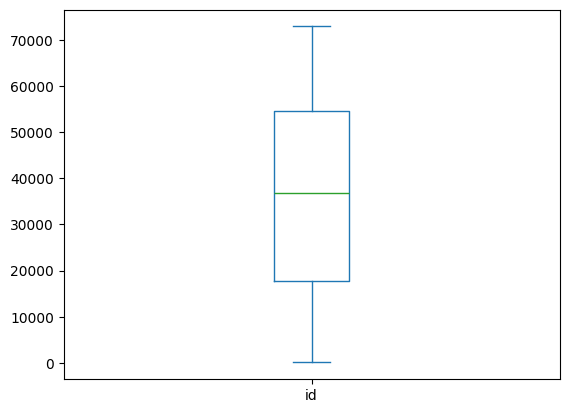

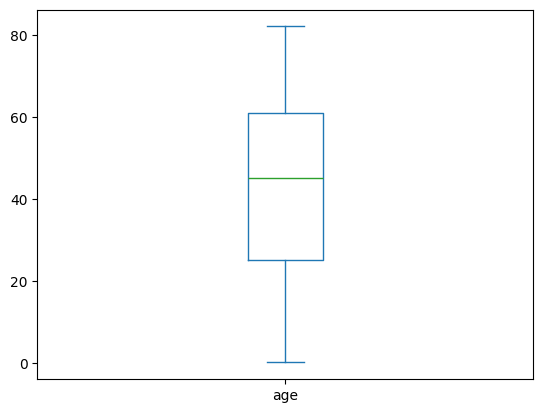

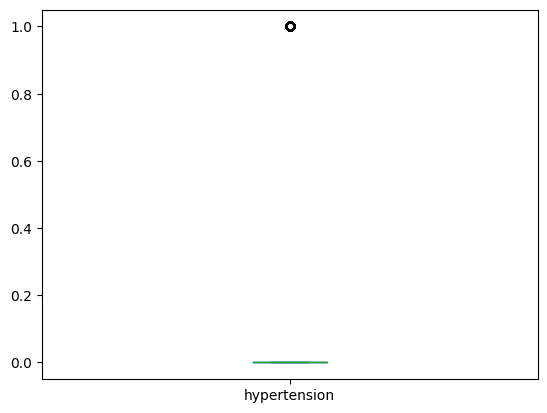

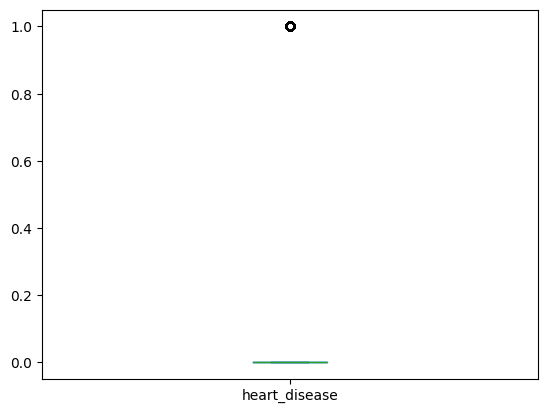

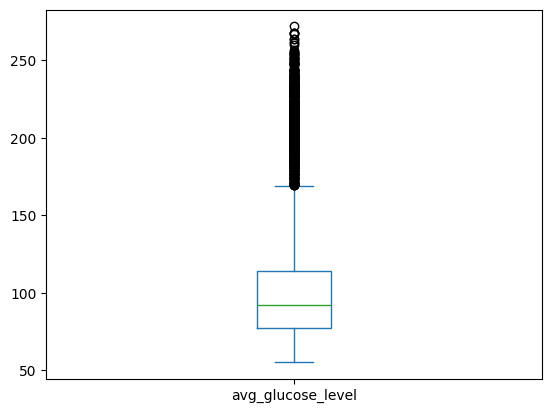

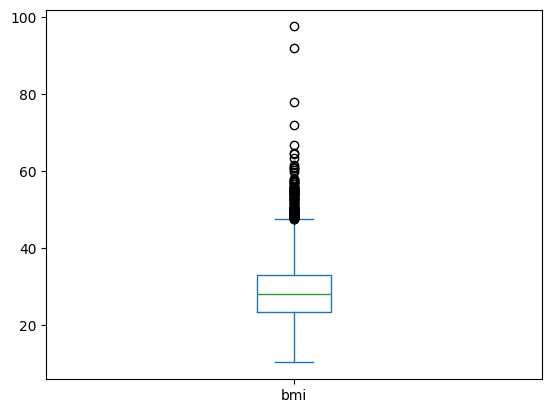

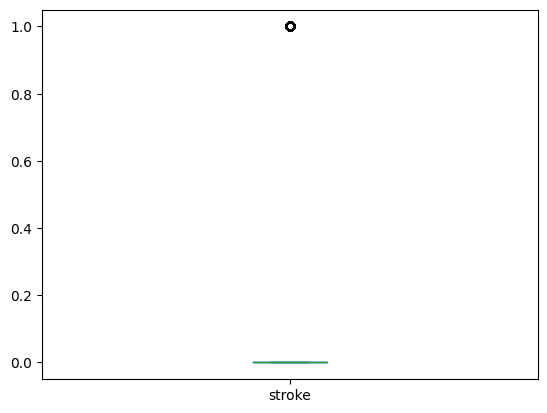

In [14]:
for col in columnas_numéricas:
    df[col].plot.box()
    plt.show()